## Introduction to Optimisation with Pyomo

### 1. Installing and Importing Packages 

We first need to pull in all the packages we will be using. Pyomo is a Python-based, open-source optimization modelling language with a diverse set of optimization capabilities. For more information, see the Pyomo [documentation](https://pyomo.readthedocs.io/en/stable/).

In [2]:
# Only run once at the start
!pip install -q pyomo
!pip install -q matplotlib

In [1]:
import matplotlib.pyplot as plt
from pyomo.environ import *
import numpy as np
from ipywidgets import FloatSlider, interact
import platform

# Ipopt solver setup for Windows or Linux
def setup_solver():
    os_name = platform.system()
    if os_name == "Windows":
        return "solver/ipopt.exe"
    elif os_name == "Linux":
        !chmod +x "solver/ipopt"
        return "solver/ipopt"


solver_executable = setup_solver()

### 2. Continuous Optimisation Problem Example

#### a. Non-Constrained Problem

$$ 
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2 
$$

$$ 
x_1, x_2 \in \mathbb{R} 
$$



In [22]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")

model.pprint()

x1: 0.0
x2: 0.0
2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + x2**2

3 Declarations: x1 x2 obj


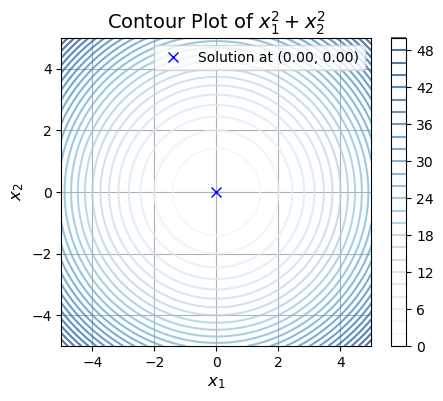

In [23]:
### RUN ME!
# Create a grid of x1 and x2 values
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Highlight the minimum point
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Set plot labels and title
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title("Contour Plot of $x_1^2 + x_2^2$", fontsize=14)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)

#### b. Optimisation Problem with Inequality Constraint

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [24]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr = model.x1**2 + model.x2**2, sense=minimize)

# Add an Equality constraint
model.constr = Constraint(expr=model.x1 + model.x2 >=1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")

model.pprint()

x1: 0.4999999962547702
x2: 0.4999999962547702
2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 0.4999999962547702 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 0.4999999962547702 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + x2**2

1 Constraint Declarations
    constr : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   1.0 : x1 + x2 :  +Inf :   True

4 Declarations: x1 x2 obj constr


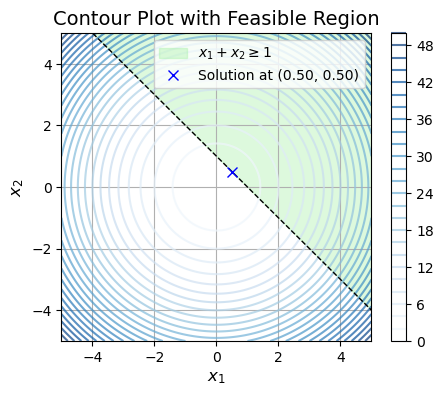

In [25]:
### RUN ME!
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Plot Feasible Region
plt.fill_betweenx(
    x1_vals,
    (1 - x1_vals),
    5,
    where=((1 - x1_vals) <= 5),
    color="lightgreen",
    alpha=0.3,
    label="$x_1 + x_2 \geq 1$",
)
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Feasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()

### c. Optimization Problem with Inequality and Equality Constraints

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
\text{s.t.} \quad x_2 = 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$


In [26]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Add an inequality constraint
model.constr2 = Constraint(expr=model.x2 + model.x1 >= 1)

# Add an equality constraint
model.constr1 = Constraint(expr=model.x2 == 1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")

model.pprint()

x1: 6.656873830587364e-05
x2: 1.0
2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value                 : Upper : Fixed : Stale : Domain
        None :  None : 6.656873830587364e-05 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   1.0 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + x2**2

2 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :   1.0 :   x2 :   1.0 :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   1.0 : x2 + x1 :  +Inf :   True

5 Declarations: x1 x2 obj constr2 constr1


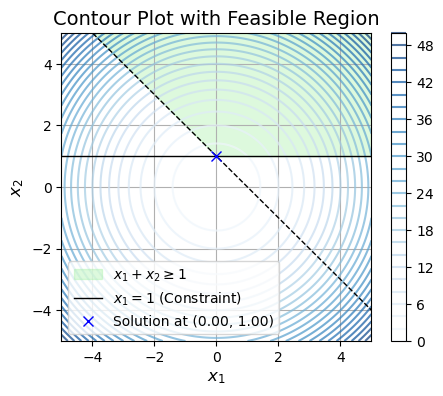

In [27]:
### RUN ME!
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Define the boundaries
x2_boundary1 = 1 - x1_vals  # x1 + x2 = 1 -> x2 = 1 - x1
x2_boundary2 = 5 * np.ones_like(x1_vals)  # x2 = 2
x2_equal_x1 = x1_vals  # x1 = x2

# Fill the area between the lines for x1 + x2 >= 1 and x2 = 2
plt.fill_between(
    x1_vals,##############ldfk[dkffdfkmf]
    np.maximum(x2_boundary1, 1),
    x2_boundary2,
    where=(x2_boundary1 <= x2_boundary2),
    color="lightgreen",
    alpha=0.3,
    label="$x_1 + x_2 \\geq 1$",
)


# Add a vertical line at the constraint x1 = -2
plt.axhline(1, color="black", linewidth=1, label="$x_1 = 1$ (Constraint)")
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Feasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()

### d. Interactive Feasibility Region Visualisation

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq C1
$$

$$
\quad x_2 = C2
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [28]:
### RUN ME! 
def plot_filled_region(C1=1.0, C2=2.0):
    # Create a grid of x1 values
    x1_vals = np.linspace(-5, 5, 400)

    # Define the boundaries based on the slider values
    x2_boundary1 = C1 - x1_vals  # x1 + x2 = C1 -> x2 = C1 - x1
    x2_boundary2 = C2 * np.ones_like(x1_vals)  # x2 = C2

    # Create a new figure
    plt.figure(figsize=(10, 4))

    # Fill the area that satisfies both constraints
    plt.fill_between(
        x1_vals,
        np.maximum(x2_boundary1, C2),  # Fill from the maximum of both boundaries
        5,  # Upper limit (arbitrary large value)
        where=(np.maximum(x2_boundary1, C2) <= 5),  # Ensure we fill within the limits
        color="orange",
        alpha=0.5,
        label=f"Feasible Region: $x_1 + x_2 \\geq {C1}$ and $x_2 \\geq {C2}$",
    )

    # Plot the lines for visualization
    plt.plot(
        x1_vals,
        x2_boundary1,
        color="blue",
        linestyle="-",
        linewidth=2,
        label=f"$x_1 + x_2 = {C1}$",
    )
    plt.plot(
        x1_vals,
        x2_boundary2,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"$x_2 = {C2}$",
    )

    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Set plot labels and title
    plt.xlabel("$x_1$", fontsize=12)
    plt.ylabel("$x_2$", fontsize=12)
    plt.title("Interactive Feasible Region Visualization", fontsize=14)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.axhline(0, color="black", linewidth=0.5, ls="--")  # X-axis
    plt.axvline(0, color="black", linewidth=0.5, ls="--")  # Y-axis
    plt.show()

# Create interactive sliders for the constraints
C1_slider = FloatSlider(
    value=1.0, min=0, max=5, step=0.1, description="C1"
)
C2_slider = FloatSlider(
    value=2.0, min=0, max=5, step=0.1, description="C2"
)

# Use interact to link the sliders to the plotting function
interact(plot_filled_region, C1=C1_slider, C2=C2_slider)

interactive(children=(FloatSlider(value=1.0, description='C1', max=5.0), FloatSlider(value=2.0, description='C…

<function __main__.plot_filled_region(C1=1.0, C2=2.0)>

### 3. Supply Chain Production and Distribution - Non-Linear Program (NLP)
The optimization problem aims to minimize total costs associated with the production and distribution of two products while satisfying demand constraints at multiple warehouses. The model incorporates decision variables for production quantities at two plants and shipping quantities to warehouses, subject to production capacity limits and demand fulfillment requirements.

$$
\begin{align*}
\text{Minimize} & \quad C \\
\text{s.t.} & \\
& z_1 + z_3 \geq D_1 \\
& z_2 + z_4 \geq D_2 \\
& x_1 + y_1 \leq C_1 \\
& x_2 + y_2 \leq C_2 \\
& x_1, x_2, y_1, y_2, z_1, z_2, z_3, z_4 \geq 0
\end{align*}
$$

#### Objective: Cost Minimisation 
$$
C = \sum (c_{p1} x_1^2 + c_{p2} x_2^2 + c_{p3} y_1^2 + c_{p4} y_2^2) + \sum (t_{a1} z_1 + t_{a2} z_2 + t_{b1} z_3 + t_{b2} z_4)
$$

#### Decision Variables
- $x_1$: Quantity of Product 1 produced at Plant 1
- $x_2$: Quantity of Product 2 produced at Plant 1
- $y_1$: Quantity of Product 1 produced at Plant 2
- $y_2$: Quantity of Product 2 produced at Plant 2
- $z_1$: Quantity of Product 1 shipped to Warehouse A
- $z_2$: Quantity of Product 2 shipped to Warehouse A
- $z_3$: Quantity of Product 1 shipped to Warehouse B
- $z_4$: Quantity of Product 2 shipped to Warehouse B

#### Constraints
1. **Demand constraints**:
$$
\text{For Product 1}: \quad z_1 + z_3 \geq D_1
$$
$$
\text{For Product 2}: \quad z_2 + z_4 \geq D_2
$$

2. **Production capacity constraints**:
$$
\text{For Product 1}: \quad x_1 + y_1 \leq C_1
$$
$$
\text{For Product 2}: \quad x_2 + y_2 \leq C_2
$$

Where:
- $C$ = Total cost
- $c_{p1}, c_{p2}, c_{p3}, c_{p4}$ = Production cost coefficients (non-linear)
- $t_{a1}, t_{a2}, t_{b1}, t_{b2}$ = Transportation costs per unit


#### a. Formulating the Optimisation Problem

In [272]:
model = ConcreteModel()

# Parameters
D1 = 300  # Demand for Product 1
D2 = 250  # Demand for Product 2
C1 = 500  # Capacity for Product 1
C2 = 500  # Capacity for Product 2

# Adjusted Non-linear production costs
cp1, cp2, cp3, cp4 = 0.3, 0.2, 0.4, 0.2  # Production cost coefficients
ta1, ta2, tb1, tb2 = 0.1, 0.1, 0.2, 0.2  # Transportation costs

# Decision variables
model.x1 = Var(within=NonNegativeReals)  # Product 1 at Plant 1
model.x2 = Var(within=NonNegativeReals)  # Product 2 at Plant 1
model.y1 = Var(within=NonNegativeReals)  # Product 1 at Plant 2
model.y2 = Var(within=NonNegativeReals)  # Product 2 at Plant 2
model.z1 = Var(within=NonNegativeReals)  # Product 1 to Warehouse A
model.z2 = Var(within=NonNegativeReals)  # Product 2 to Warehouse A
model.z3 = Var(within=NonNegativeReals)  # Product 1 to Warehouse B
model.z4 = Var(within=NonNegativeReals)  # Product 2 to Warehouse B

# Objective function: Minimize total costs
model.cost = Objective(
    expr=(cp1 * model.x1**2 + cp2 * model.x2**2 +
          cp3 * model.y1**2 + cp4 * model.y2**2 +
          ta1 * model.z1 + ta2 * model.z2 +
          tb1 * model.z3 + tb2 * model.z4),
    sense=minimize)

# Constraints
model.demand1 = Constraint(expr=model.z1 + model.z3 >= D1)  # Demand for Product 1
model.demand2 = Constraint(expr=model.z2 + model.z4 >= D2)  # Demand for Product 2
model.capacity1 = Constraint(expr=model.x1 + model.y1 <= C1)  # Capacity for Product 1
model.capacity2 = Constraint(expr=model.x2 + model.y2 <= C2)  # Capacity for Product 2

# Shipping constraints to ensure that shipments do not exceed production
model.shipping1_A = Constraint(expr=model.z1 <= model.x1)  # Product 1 to Warehouse A
model.shipping3_B = Constraint(expr=model.z3 <= model.x1)  # Product 1 to Warehouse B
model.shipping2_A = Constraint(expr=model.z2 <= model.x2)  # Product 2 to Warehouse A
model.shipping4_B = Constraint(expr=model.z4 <= model.y2)  # Product 2 to Warehouse B

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Solve the primal model
solver = SolverFactory("ipopt", executable=solver_executable)
results = solver.solve(model)

# Define the shadow prices
u1 = model.dual[model.demand1]  # Shadow price for demand 1
u2 = model.dual[model.demand2]  # Shadow price for demand 2
v1 = model.dual[model.capacity1]  # Shadow price for capacity 1
v2 = model.dual[model.capacity2]  # Shadow price for capacity 2

# Print the optimisation results
print("================ Optimisation Results ================")
print("Objective Value, Total Cost:", f"{model.cost():.3f}", "\n")
print("Decision Variables:")
print("--- Quantity of Product 1 produced at Plant 1 (x_1):", f"{model.x1.value:.3f}", "\n")
print("--- Quantity of Product 2 produced at Plant 1 (x_2):", f"{model.x2.value:.3f}", "\n")
print("--- Quantity of Product 1 produced at Plant 2 (y_1):", f"{model.y1.value:.3f}", "\n")
print("--- Quantity of Product 2 produced at Plant 2 (y_2):", f"{model.y2.value:.3f}", "\n")
print("--- Quantity of Product 1 shipped to Warehouse A (z_1):", f"{model.z1.value:.3f}", "\n")
print("--- Quantity of Product 2 shipped to Warehouse A (z_2):", f"{model.z2.value:.3f}", "\n")
print("--- Quantity of Product 1 shipped to Warehouse B (z_3):", f"{model.z3.value:.3f}", "\n")
print("--- Quantity of Product 2 shipped to Warehouse B (z_4):", f"{model.z4.value:.3f}", "\n")


================ Optimisation Results ================
Objective Value, Total Cost: 13082.493 

Decision Variables:
--- Quantity of Product 1 produced at Plant 1 (x_1): 150.000 

--- Quantity of Product 2 produced at Plant 1 (x_2): 125.125 

--- Quantity of Product 1 produced at Plant 2 (y_1): 0.001 

--- Quantity of Product 2 produced at Plant 2 (y_2): 124.875 

--- Quantity of Product 1 shipped to Warehouse A (z_1): 150.000 

--- Quantity of Product 2 shipped to Warehouse A (z_2): 125.125 

--- Quantity of Product 1 shipped to Warehouse B (z_3): 150.000 

--- Quantity of Product 2 shipped to Warehouse B (z_4): 124.875 



#### b. Exploring the Marginal Cost / Lagrange Multipliers

In [273]:
print("================ Dual Calculation ================")
print("Dual Values for Constraints:")
print("Demand 1 (z1 + z3 >= D1):", model.dual[model.demand1])
print("Demand 2 (z2 + z4 >= D2):", model.dual[model.demand2])
print("Capacity 1 (x1 + y1 <= C1):", model.dual[model.capacity1])
print("Capacity 2 (x2 + y2 <= C2):", model.dual[model.capacity2])

================ Dual Calculation ================
Dual Values for Constraints:
Demand 1 (z1 + z3 >= D1): -45.149999547129774
Demand 2 (z2 + z4 >= D2): -50.14999949599982
Capacity 1 (x1 + y1 <= C1): 2.5883192880425334e-10
Capacity 2 (x2 + y2 <= C2): 3.6272726179701725e-10


In [274]:
# Step 2: Modify a parameter (e.g., increase demand for Product 1)
D2_new = 251  # New demand for Product 1

# Step 3: Calculate the new maximum profit using dual values
max_profit_with_duals = model.cost() - ((D2_new-D2) * u2)
print("================ Dual Calculation ================")
print("Calculated Maximum Profit with Dual Values:", f"{max_profit_with_duals:.0f}")

# Step 4: Remove the old demand constraint and add a new one
model.del_component(model.demand2)  # Remove old demand constraint
model.demand2 = Constraint(expr=model.z2 + model.z4 >= D2_new)  # Update constraint for Product 1

# Resolve the updated model
results_new = solver.solve(model)

# Display results of the updated primal model
print("\n================ Updated Optimisation Results ================")
print("Objective Value, Total Cost (Updated):", f"{model.cost():.0f}", "\n")
# print("Decision Variables (Updated):")
# print("--- Quantity of Product 1 produced at Plant 1 (x_1):", f"{model.x1.value:.3f}", "\n")
# print("--- Quantity of Product 2 produced at Plant 1 (x_2):", f"{model.x2.value:.3f}", "\n")
# print("--- Quantity of Product 1 produced at Plant 2 (y_1):", f"{model.y1.value:.3f}", "\n")
# print("--- Quantity of Product 2 produced at Plant 2 (y_2):", f"{model.y2.value:.3f}", "\n")
# print("--- Quantity of Product 1 shipped to Warehouse A (z_1):", f"{model.z1.value:.3f}", "\n")
# print("--- Quantity of Product 2 shipped to Warehouse A (z_2):", f"{model.z2.value:.3f}", "\n")
# print("--- Quantity of Product 1 shipped to Warehouse B (z_3):", f"{model.z3.value:.3f}", "\n")
# print("--- Quantity of Product 2 shipped to Warehouse B (z_4):", f"{model.z4.value:.3f}", "\n")

================ Dual Calculation ================
Calculated Maximum Profit with Dual Values: 13133

================ Updated Optimisation Results ================
Objective Value, Total Cost (Updated): 13133 



In [271]:
# Binding constraints identified for Product 2
capacity_remaining_2 = C2 - (model.x2.value + model.y2.value)
shipping_slack_2 = min(model.x2.value - model.z2.value, model.y2.value - model.z4.value)

# Allowable increase in demand for Product 2
allowable_increase_2 = min(capacity_remaining_2, shipping_slack_2)

# Allowable decrease in demand for Product 2
demand_satisfied_2 = model.z2.value + model.z4.value - D2
allowable_decrease_2 = demand_satisfied_2

print(f"Allowable Increase in Demand for Product 2: {allowable_increase_2}")
print(f"Allowable Decrease in Demand for Product 2: {allowable_decrease_2}")


Allowable Increase in Demand for Product 2: -8.190866651602846e-09
Allowable Decrease in Demand for Product 2: 0.9999974918055727
